KNN

In [9]:
import pandas as pd
import numpy as np
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
X=data.drop(columns='label')
Y=data['label']
test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, Y)                  

KNeighborsClassifier(n_neighbors=3)

In [11]:
label  = model.predict(test_data) 

In [12]:
df=test_data
df=pd.DataFrame({'Label':label})
df['ImageId'] = np.arange(len(df))+1
df

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5
...,...,...
27995,9,27996
27996,7,27997
27997,3,27998
27998,9,27999


In [13]:
df.to_csv('submission_version_2.csv', index=False)

In [14]:
import pickle
with open('Digit_Recognizer.pkl', 'wb') as file:
    pickle.dump(model, file)

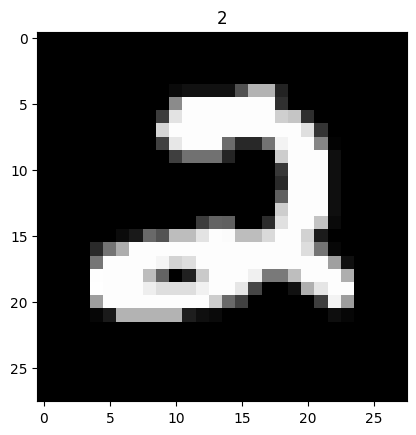

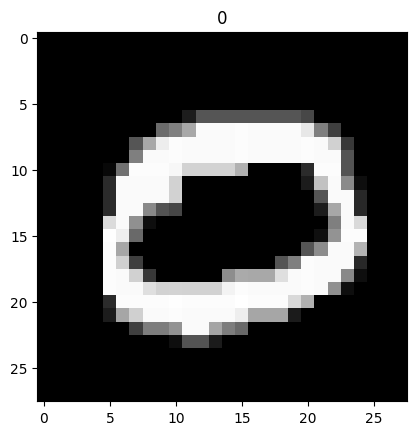

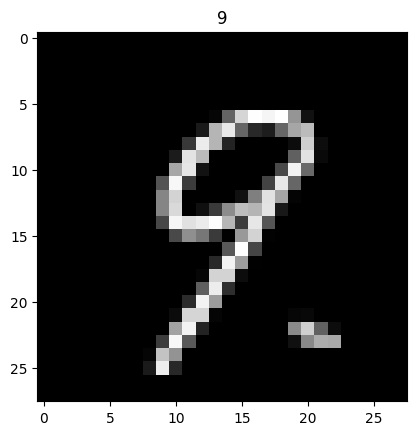

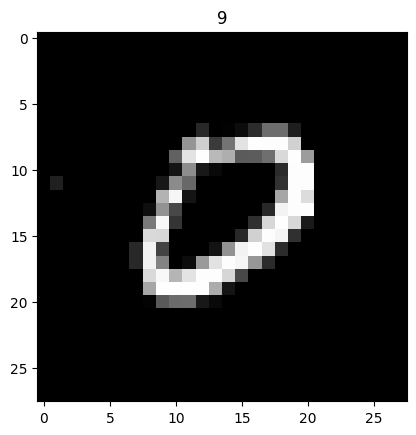

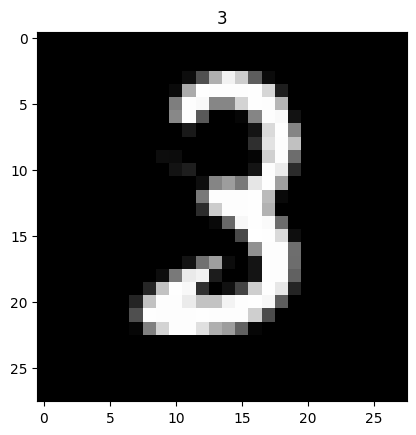

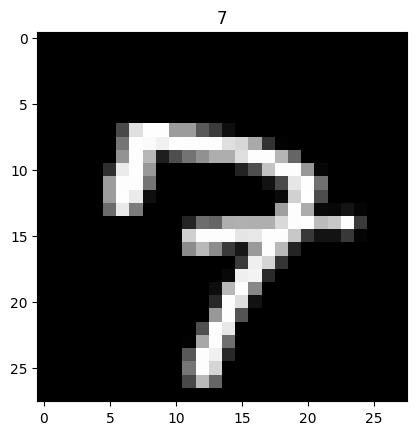

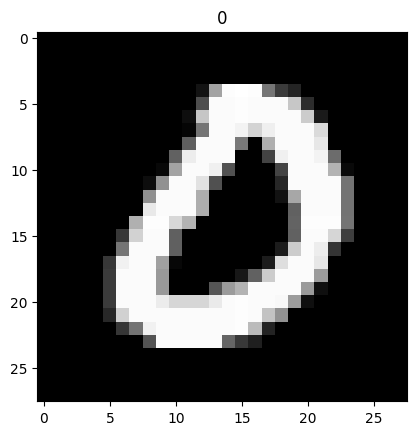

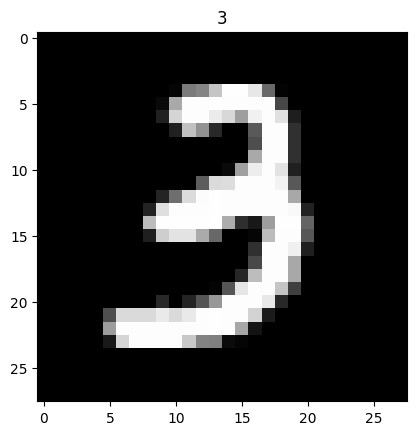

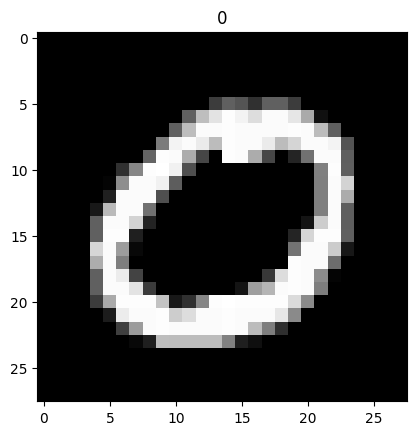

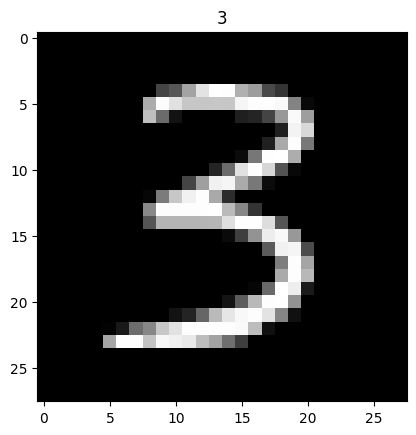

In [15]:
label  = model.predict(test_data)
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

for i in range(10):       #length of test_data
    plt.title(label[i])
    img = test_data.iloc[i].values
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()
    


In [16]:
from sklearn.model_selection import cross_val_score
model_knn5 = KNeighborsClassifier(n_neighbors=5)
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn3 = KNeighborsClassifier(n_neighbors=3)
model_knn2 = KNeighborsClassifier(n_neighbors=2)
model_knn1 = KNeighborsClassifier(n_neighbors=1)
model_knn10 = KNeighborsClassifier(n_neighbors=10)
knn_scores5 = cross_val_score(model_knn5, X, Y, cv=10, scoring='accuracy')
knn_scores4 = cross_val_score(model_knn4, X, Y, cv=10, scoring='accuracy')
knn_scores3 = cross_val_score(model_knn3, X, Y, cv=10, scoring='accuracy')
knn_scores2 = cross_val_score(model_knn2, X, Y, cv=10, scoring='accuracy')
knn_scores1 = cross_val_score(model_knn1, X, Y, cv=10, scoring='accuracy')
knn_scores10 = cross_val_score(model_knn10, X, Y, cv=10, scoring='accuracy')
#print("KNN scores:", knn_scores)

In [17]:
print("Accuracy of KNN_Model 5:",(sum(knn_scores5)/len(knn_scores5))*100,"%")
print("Accuracy of KNN_Model 4:",(sum(knn_scores4)/len(knn_scores4))*100,"%")
print("Accuracy of KNN_Model 3:",(sum(knn_scores3)/len(knn_scores3))*100,"%")
print("Accuracy of KNN_Model 2:",(sum(knn_scores2)/len(knn_scores2))*100,"%")
print("Accuracy of KNN_Model 1:",(sum(knn_scores1)/len(knn_scores1))*100,"%")
print("Accuracy of KNN_Model 10:",(sum(knn_scores10)/len(knn_scores10))*100,"%")

Accuracy of KNN_Model 5: 96.73809523809526 %
Accuracy of KNN_Model 4: 96.72380952380955 %
Accuracy of KNN_Model 3: 96.8309523809524 %
Accuracy of KNN_Model 2: 96.18809523809524 %
Accuracy of KNN_Model 1: 96.74047619047619 %
Accuracy of KNN_Model 10: 96.44285714285714 %


CNN

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
X = data.drop(columns='label')
Y = data['label']
test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Preprocess the data
X = X / 255.0  # Scale pixel values to the range [0, 1]
X = X.values.reshape(-1, 28, 28, 1)  # Reshape data to (num_samples, 28, 28, 1) for grayscale images
Y = tf.keras.utils.to_categorical(Y, num_classes=10)  # One-hot encode labels

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

# Save the model
model.save('digit_recognizer_cnn.pkl')

# Load the test data
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Preprocess the test data
test_data = test_data / 255.0  # Scale pixel values to the range [0, 1]
test_data = test_data.values.reshape(-1, 28, 28, 1)  # Reshape test data to (num_samples, 28, 28, 1) for grayscale images

# Predict using the trained model
predictions = model.predict(test_data)

# Convert predictions to labels
labels = [np.argmax(prediction) for prediction in predictions]

# Create a DataFrame with labels and ImageId
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(labels) + 1), 'Label': labels})

# Save the submission file
submission_df.to_csv('submission_version_3.csv', index=False)


Epoch 1/10
1050/1050 [==============================] - 19s 17ms/step - loss: 0.2038 - accuracy: 0.9379 - val_loss: 0.1076 - val_accuracy: 0.9683
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0644 - val_accuracy: 0.9810
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0562 - val_accuracy: 0.9824
Epoch 4/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0606 - val_accuracy: 0.9823
Epoch 5/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 6/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0560 - val_accuracy: 0.9851
Epoch 7/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0602 -